In [1]:
PATH_d = '/home/pirl/Desktop/A반_2조_와인/'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from kmodes.kmodes import KModes

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import levene
from statsmodels.api import Logit

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import os
os.environ["PATH"]+=os.pathsep+""
import matplotlib.font_manager as fm
plt.rc("font",family="NanumBarunGothic")

In [2]:
file=PATH_d+'wine_side.csv'
data=pd.read_csv(file,engine="python",encoding='euc-kr')
data.head()

,seq,side,choice1
0,1,Ricotta,E
1,2,Ricotta,E
2,3,Camenbert,B
3,4,Roquefort,D
4,5,Cheddar,E


In [3]:
# 명목형 변수 목록
obj_cols=data.select_dtypes("object").columns

for col in obj_cols:
    _n=len(data[col].value_counts())
    print(col, ":", str(_n))

side : 8
choice1 : 8


### 결측치 제거

In [4]:
data.isnull().sum()

seq         0
side       64
choice1     0
dtype: int64

In [5]:
data_wine_choice = data.dropna()

In [6]:
data_wine_choice.isnull().sum(axis=0)

seq        0
side       0
choice1    0
dtype: int64

In [7]:
data_wine_choice.to_csv('wine_side_s.csv')

### 치즈별 선택빈도 (null data)

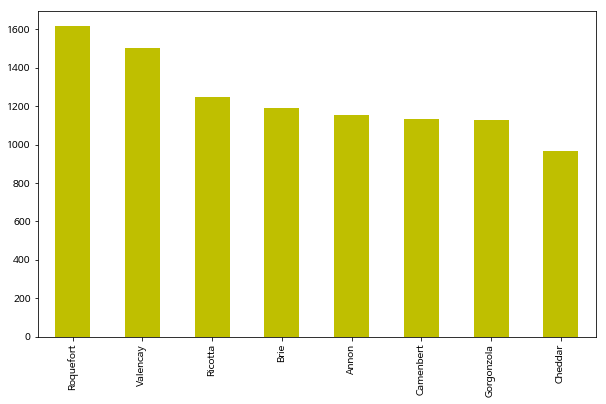

In [8]:
graph=data_wine_choice["side"].value_counts()
graph.plot.bar( color='y', figsize=(10,6))

### 와인별 선택빈도 (original data)

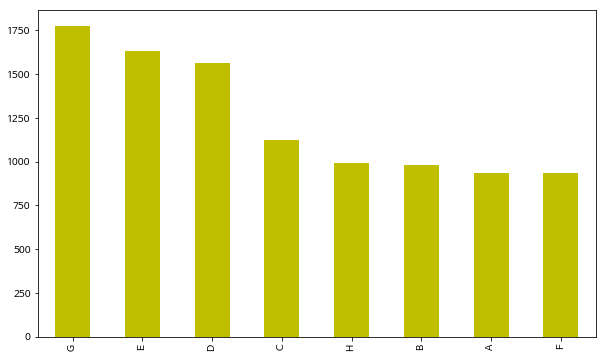

In [9]:
graph=data_wine_choice["choice1"].value_counts()
graph.plot.bar( color='y', figsize=(10,6))

### 와인별 안주 상관성 분석 (original data)

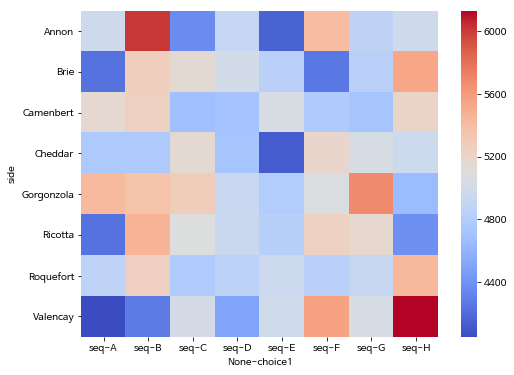

In [10]:
graph=data.groupby(["side","choice1"], as_index=False).agg("mean")
graph2=graph.pivot("side","choice1")
plt.figure(figsize=(8,6))
sns.heatmap(graph2, cmap="coolwarm")

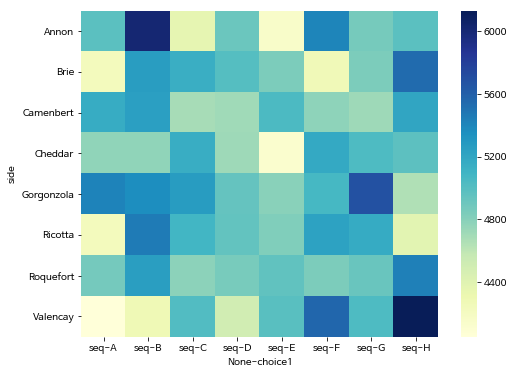

In [11]:
heatmap1_data = pd.pivot_table(data, index=['side'], columns='choice1')
plt.figure(figsize=(8,6))
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [12]:
# heat map => 결측지 제거 데이터와 원래 데이터 결과 같음

### 와인별 치즈 선택분포비율 (original data)

In [13]:
data.head()

,seq,side,choice1
0,1,Ricotta,E
1,2,Ricotta,E
2,3,Camenbert,B
3,4,Roquefort,D
4,5,Cheddar,E


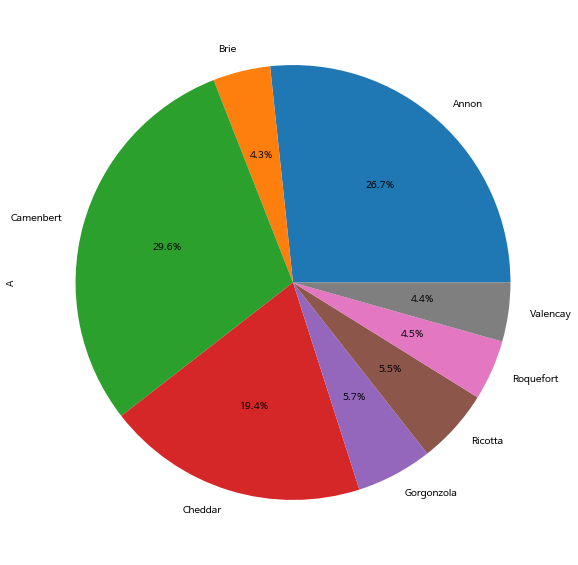

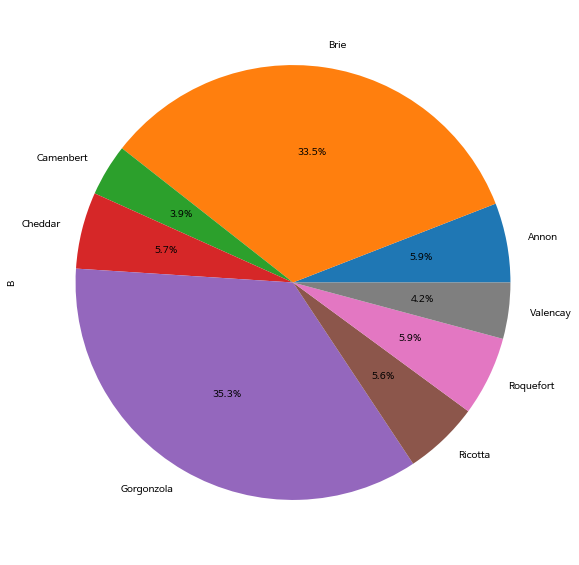

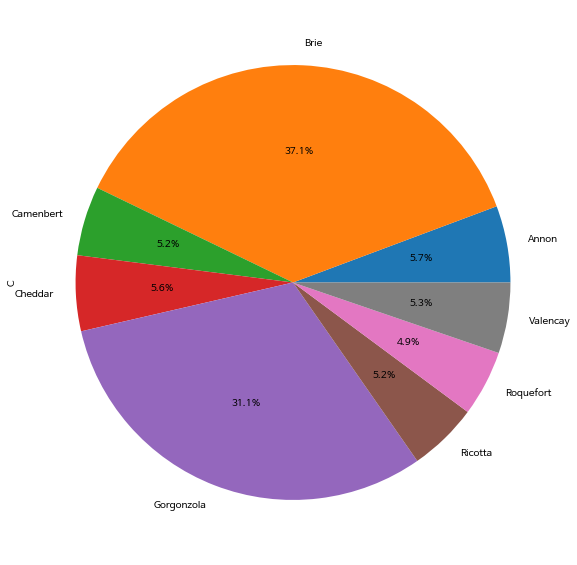

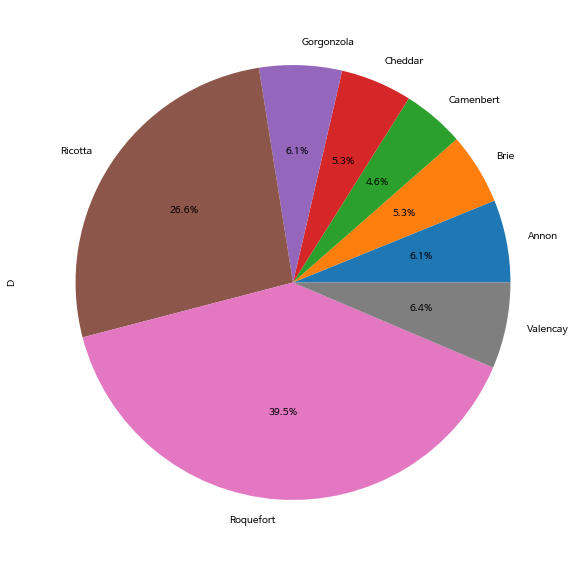

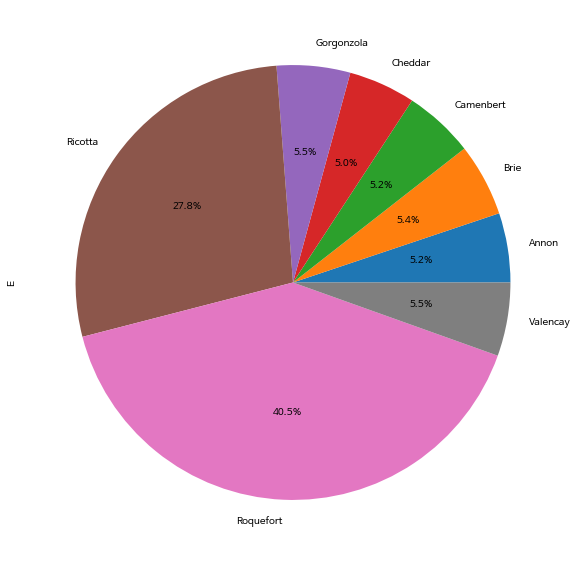

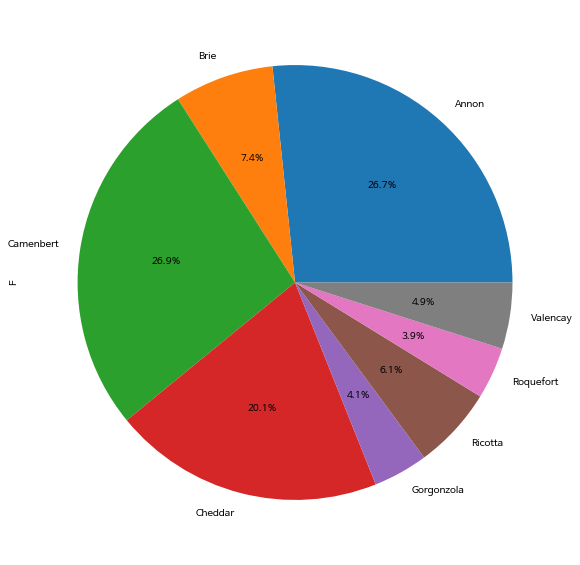

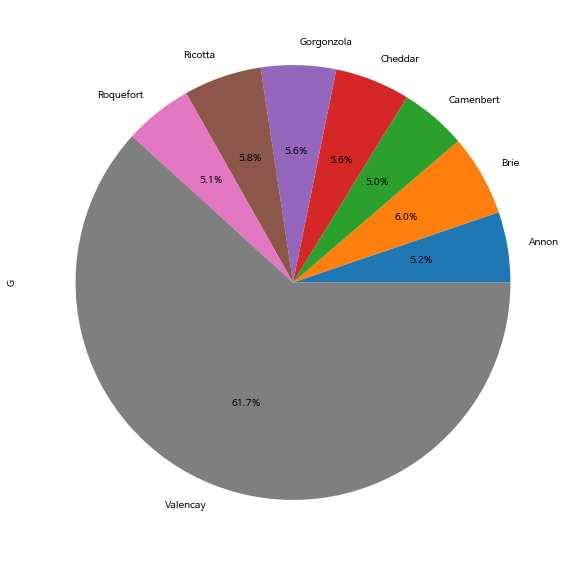

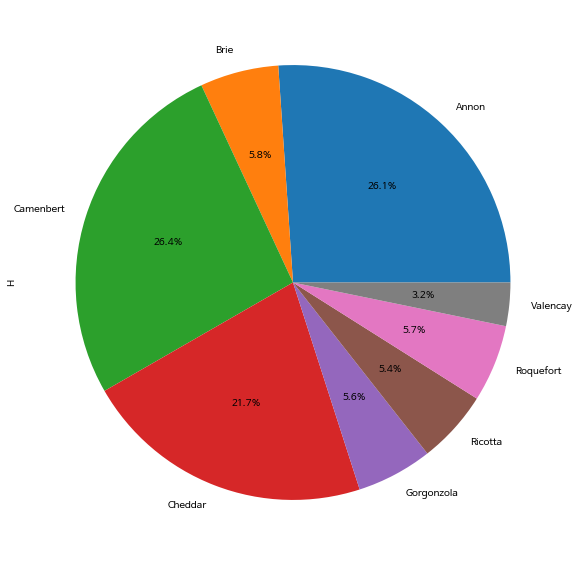

In [14]:
for wine_cat in data.groupby('choice1').size().index:
#     print(data[data['choice1']==wine_cat].groupby('side').size())
#     data[data['choice1']==wine_cat].groupby('side').size()
    graph=data[data['choice1']==wine_cat].groupby('side').size()
    plt.figure(figsize=(10,10))
    graph.plot.pie(y="choice1", autopct="%.1f%%",  label=wine_cat)

In [15]:
data[data['choice1']=='A'].groupby('side').size()

side
Annon         250
Brie           40
Camenbert     277
Cheddar       182
Gorgonzola     53
Ricotta        52
Roquefort      42
Valencay       41
dtype: int64

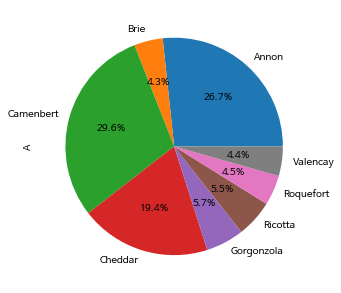

In [16]:
graph=data[data['choice1']=='A'].groupby('side').size()
plt.figure(figsize=(5,5))
graph.plot.pie(y="choice1_A", autopct="%.1f%%",  label="A")

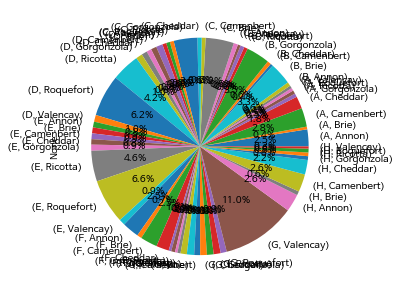

In [17]:
graph=data.groupby(["choice1","side"]).size()
plt.figure(figsize=(10,5))
graph.plot.pie(y="side", autopct="%.1f%%")

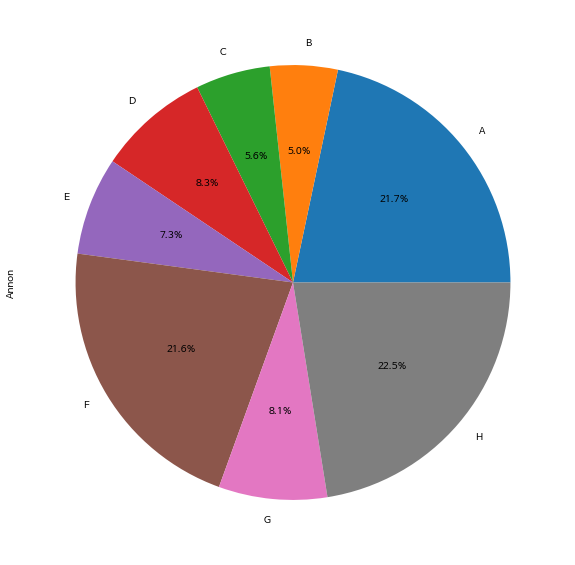

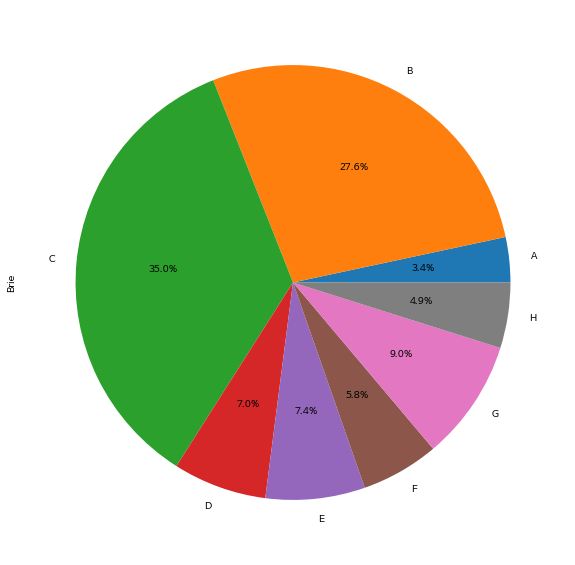

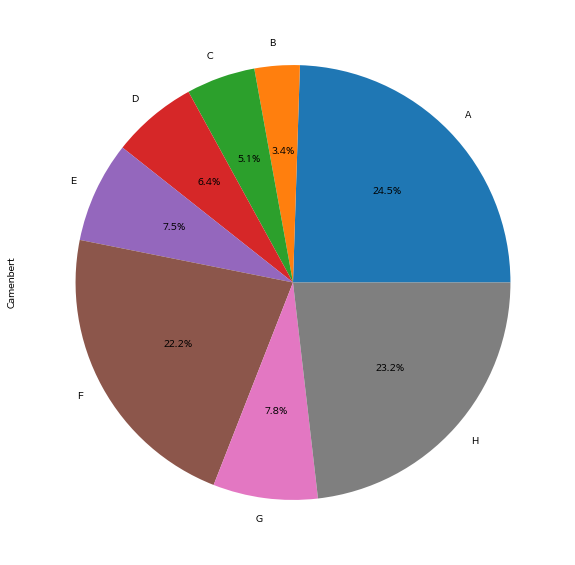

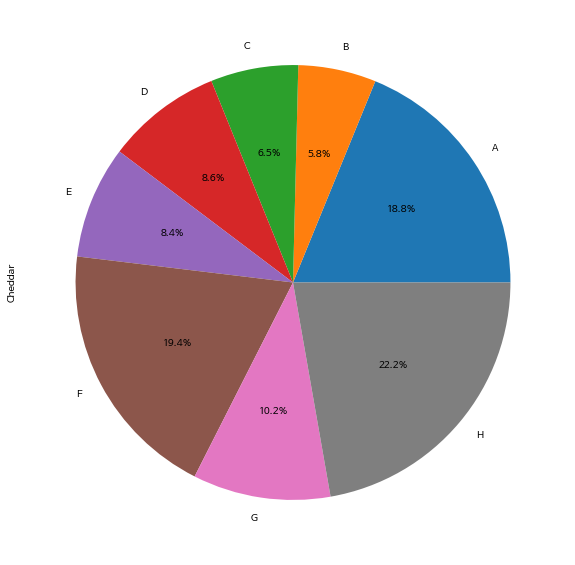

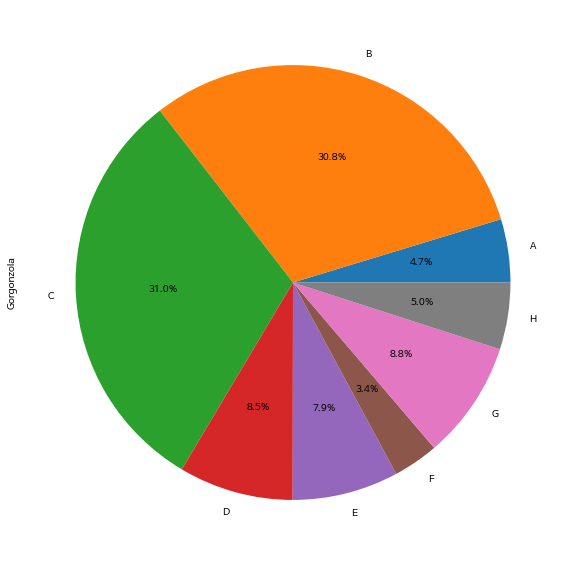

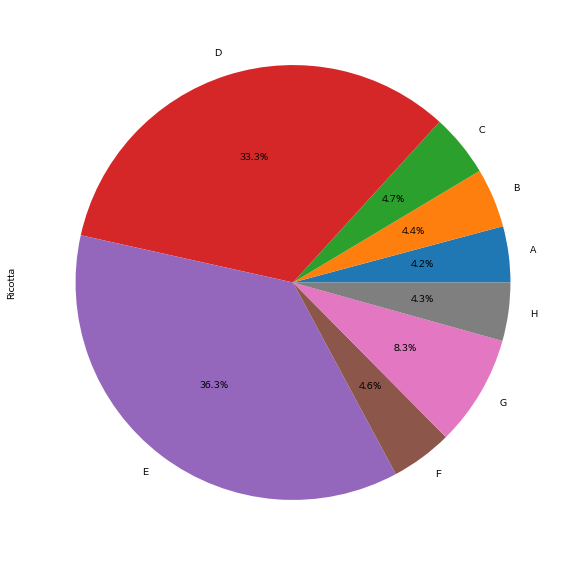

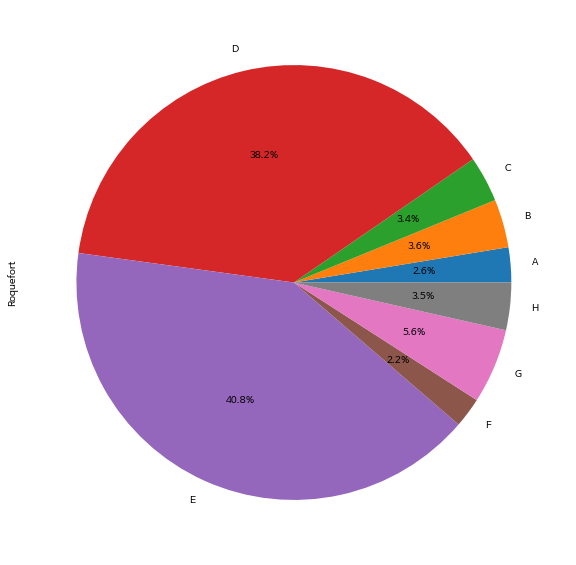

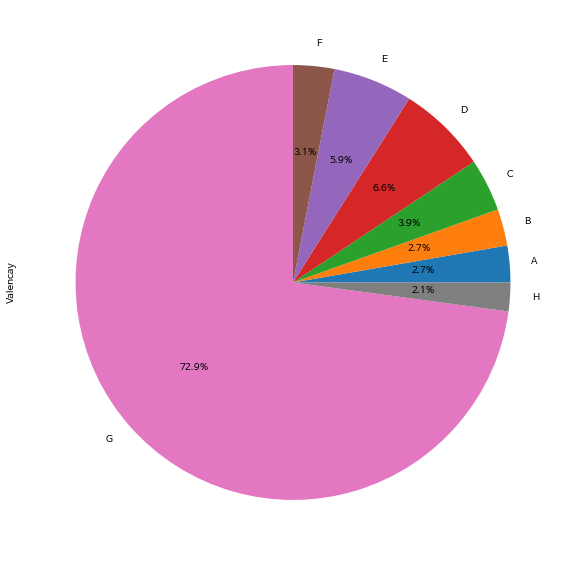

In [18]:
for wine_cat in data.groupby('side').size().index:
#     print(data[data['choice1']==wine_cat].groupby('side').size())
#     data[data['choice1']==wine_cat].groupby('side').size()
    graph=data[data['side']==wine_cat].groupby('choice1').size()
    plt.figure(figsize=(10,10))
    graph.plot.pie(y="side", autopct="%.1f%%",  label=wine_cat)

### 안주에 따라 와인선택이 달라지는지의 여부를 검정 - 카이제곱 검정

In [19]:
# 교차표 
def print_crosstab(data, var):
    print(pd.crosstab(index = data["side"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["side"], columns = data[var], normalize = "columns").round(3))

In [20]:
print_crosstab(data, "choice1")

choice1       A    B    C    D    E    F     G    H
side                                               
Annon       250   58   64   96   84  249    93  259
Brie         40  329  417   83   88   69   107   58
Camenbert   277   38   58   72   85  251    88  262
Cheddar     182   56   63   83   81  188    99  215
Gorgonzola   53  347  349   96   89   38    99   56
Ricotta      52   55   58  415  453   57   103   54
Roquefort    42   58   55  618  660   36    90   57
Valencay     41   41   59  100   89   46  1096   32

choice1         A      B      C      D      E      F      G      H
side                                                              
Annon       0.267  0.059  0.057  0.061  0.052  0.267  0.052  0.261
Brie        0.043  0.335  0.371  0.053  0.054  0.074  0.060  0.058
Camenbert   0.296  0.039  0.052  0.046  0.052  0.269  0.050  0.264
Cheddar     0.194  0.057  0.056  0.053  0.050  0.201  0.056  0.217
Gorgonzola  0.057  0.353  0.311  0.061  0.055  0.041  0.056  0.056
Ricotta   

In [21]:
# 카이제곱검정
df = pd.DataFrame({'Annon':[250,58,164,96,84,249,93,259], 'Brie':[40,329,417,83,88,69,107,58], 
                   'Camenbert':[277,38,58,72,85,251,88,262], 'Cheddar':[182,56,63,83,81,188,99,215],
                  'Gorgonzola':[53,347,349,96,89,38,99,56], 'Ricotta':[52,55,58,415,453,57,103,54],
                  'Roquefort':[42,58,55,618,660,36,90,57], 'Valencay':[41,41,59,100,89,46,1096,32]})
chi, pval, dof, expected = stats.chi2_contingency(df.T)
print('chi2 :{:.3f}, p val : {:.3f}'.format(chi,pval))

chi2 :9979.936, p val : 0.000


### 안주선택시 와인선택의 연관성 분석 - 연관분석

In [22]:
file=PATH_d+'wine_side_s.csv'
data=pd.read_csv(file,engine="python",encoding='euc-kr')
data.head()

,Unnamed: 0,seq,side,choice1
0,0,1,Ricotta,E
1,1,2,Ricotta,E
2,2,3,Camenbert,B
3,3,4,Roquefort,D
4,4,5,Cheddar,E


In [23]:
li = list()

In [24]:
for i in range(len(data['side'].values)):
    li.append([data['side'].values[i], data['choice1'].values[i]])


In [25]:
li

[['Ricotta', 'E'],
 ['Ricotta', 'E'],
 ['Camenbert', 'B'],
 ['Roquefort', 'D'],
 ['Cheddar', 'E'],
 ['Brie', 'B'],
 ['Brie', 'C'],
 ['Roquefort', 'E'],
 ['Brie', 'E'],
 ['Roquefort', 'D'],
 ['Ricotta', 'H'],
 ['Ricotta', 'D'],
 ['Gorgonzola', 'A'],
 ['Gorgonzola', 'G'],
 ['Cheddar', 'G'],
 ['Brie', 'B'],
 ['Ricotta', 'D'],
 ['Gorgonzola', 'E'],
 ['Gorgonzola', 'B'],
 ['Brie', 'A'],
 ['Brie', 'G'],
 ['Ricotta', 'E'],
 ['Cheddar', 'B'],
 ['Ricotta', 'E'],
 ['Roquefort', 'A'],
 ['Cheddar', 'D'],
 ['Roquefort', 'D'],
 ['Ricotta', 'D'],
 ['Gorgonzola', 'C'],
 ['Gorgonzola', 'H'],
 ['Annon', 'C'],
 ['Brie', 'A'],
 ['Roquefort', 'D'],
 ['Cheddar', 'H'],
 ['Valencay', 'G'],
 ['Roquefort', 'E'],
 ['Ricotta', 'C'],
 ['Ricotta', 'H'],
 ['Cheddar', 'F'],
 ['Gorgonzola', 'C'],
 ['Ricotta', 'G'],
 ['Roquefort', 'G'],
 ['Roquefort', 'C'],
 ['Annon', 'E'],
 ['Brie', 'G'],
 ['Valencay', 'D'],
 ['Camenbert', 'H'],
 ['Gorgonzola', 'D'],
 ['Roquefort', 'E'],
 ['Valencay', 'G'],
 ['Brie', 'C'],
 ['Annon', 

In [26]:
# Items 중 index 0번이 갖고 있으면 True, 아니면 False
enc=TransactionEncoder()
row_enc=enc.fit_transform(X=li)
# 위의 함수는 데이터를 행렬의 형태로 변환  pandas의 DataFrame의 형태로 변환
asso=pd.DataFrame(row_enc, columns=enc.columns_)
asso.head()

,A,Annon,B,Brie,C,Camenbert,Cheddar,D,E,F,G,Gorgonzola,H,Ricotta,Roquefort,Valencay
0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False


In [27]:
# 최소 지지도
min_t=0.001
# 지지도 계산
freq=apriori(asso, min_support=min_t, use_colnames=True).sort_values(by='support',ascending=False)
freq.round(3)

,support,itemsets
10,0.179,(G)
8,0.164,(E)
14,0.163,(Roquefort)
7,0.157,(D)
15,0.151,(Valencay)
13,0.126,(Ricotta)
3,0.120,(Brie)
1,0.116,(Annon)
5,0.114,(Camenbert)
11,0.113,(Gorgonzola)


In [28]:
# 기준=신뢰도, 최소 신뢰도=0.5
asso_rule=association_rules(freq, metric="confidence",min_threshold=min_t)
asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Valencay),(G),0.151,0.179,0.110,0.729,4.079,0.083,3.028
1,(G),(Valencay),0.179,0.151,0.110,0.617,4.079,0.083,2.218
2,(E),(Roquefort),0.164,0.163,0.066,0.405,2.491,0.040,1.408
3,(Roquefort),(E),0.163,0.164,0.066,0.408,2.491,0.040,1.413
4,(D),(Roquefort),0.157,0.163,0.062,0.395,2.431,0.037,1.385
5,(Roquefort),(D),0.163,0.157,0.062,0.382,2.431,0.037,1.365
6,(E),(Ricotta),0.164,0.126,0.046,0.278,2.216,0.025,1.211
7,(Ricotta),(E),0.126,0.164,0.046,0.363,2.216,0.025,1.313
8,(Brie),(C),0.120,0.113,0.042,0.350,3.098,0.028,1.365
9,(C),(Brie),0.113,0.120,0.042,0.371,3.098,0.028,1.400


## 안주 전 와인와 안주 후 와인

### 결측치 제거

In [29]:
file=PATH_d+'wine_side.csv'
data_side=pd.read_csv(file,engine="python",encoding='euc-kr')
data_side.head()

,seq,side,choice1
0,1,Ricotta,E
1,2,Ricotta,E
2,3,Camenbert,B
3,4,Roquefort,D
4,5,Cheddar,E


In [30]:
file=PATH_d+'wine_preference.csv'
data_prefer=pd.read_csv(file,engine="python",encoding='euc-kr')
data_prefer.head()

,seq,gender,age,job,marital,province,city,choice
0,1.0,MALE,40대,자영업,MARREID,부산시,기장군,E
1,2.0,FEMALE,20대,자영업,SINGLE,충청도,천안시,E
2,3.0,MALE,40대,임시직,MARREID,서울시,강남구,C
3,4.0,FEMALE,50대,벤처직원,MARREID,경상도,거제시,D
4,5.0,MALE,30대,교수,MARREID,경기도,포천시,E


In [31]:
data_prefer.isnull().sum()

seq         20
gender      14
age          0
job          0
marital     30
province    30
city         0
choice       0
dtype: int64

In [32]:
data_side.isnull().sum()

seq         0
side       64
choice1     0
dtype: int64

In [33]:
data_prefer = data_prefer.dropna(axis=0)

In [34]:
data_prefer.isnull().sum()

seq         0
gender      0
age         0
job         0
marital     0
province    0
city        0
choice      0
dtype: int64

In [35]:
data_side = data_side.dropna(axis=0)

In [36]:
data_side.isnull().sum()

seq        0
side       0
choice1    0
dtype: int64

### seq에 맞춰서 preferency와 side data 합치기

In [37]:
data_merge = data_prefer.merge(data_side,on='seq')

In [38]:
data_merge.to_csv('wine_side_prefer.csv')

In [39]:
data_merge.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
0,1.0,MALE,40대,자영업,MARREID,부산시,기장군,E,Ricotta,E
1,2.0,FEMALE,20대,자영업,SINGLE,충청도,천안시,E,Ricotta,E
2,3.0,MALE,40대,임시직,MARREID,서울시,강남구,C,Camenbert,B
3,4.0,FEMALE,50대,벤처직원,MARREID,경상도,거제시,D,Roquefort,D
4,5.0,MALE,30대,교수,MARREID,경기도,포천시,E,Cheddar,E


### 치즈를 기준으로 와인 분포 파이 그래프

- A

In [40]:
def pie(data):
    counts=data['choice1'].value_counts()
    counts.plot.pie(autopct="%.1f%%")

In [41]:
data_choice_A=data_merge[data_merge['choice']=='A']
data_choice_A.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
12,13.0,MALE,50대,중소기업직원,MARREID,서울시,마포구,A,Gorgonzola,A
19,20.0,MALE,50대,중소기업직원,MARREID,서울시,강남구,A,Brie,A
24,25.0,MALE,50대,변호사,MARREID,부산시,해운대구,A,Roquefort,A
28,30.0,MALE,50대,교수,SINGLE,전라도,곡성군,A,Gorgonzola,H
36,38.0,MALE,50대,기자,SINGLE,서울시,강남구,A,Ricotta,H


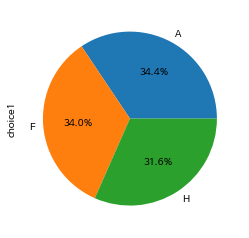

In [42]:
pie(data_choice_A)

- A->A

In [43]:
AA_side=data_merge['side'][(data_merge['choice']=='A')&(data_merge['choice1']=='A')].value_counts()
AA_side

Camenbert     246
Gorgonzola     26
Annon          23
Ricotta        17
Valencay       16
Roquefort      15
Cheddar        14
Brie           14
Name: side, dtype: int64

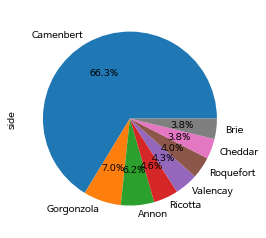

In [44]:
AA_side.plot.pie(autopct="%.1f%%")

- A->F

In [45]:
AF_side=data_merge['side'][(data_merge['choice']=='A')&(data_merge['choice1']=='F')].value_counts()
AF_side

Camenbert     219
Brie           29
Ricotta        26
Annon          25
Gorgonzola     22
Cheddar        19
Roquefort      14
Valencay       13
Name: side, dtype: int64

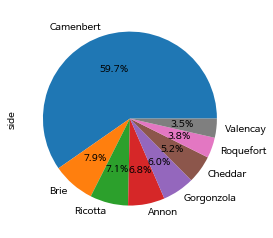

In [46]:
AF_side.plot.pie(autopct="%.1f%%")

- A->H

In [47]:
AH_side=data_merge['side'][(data_merge['choice']=='A')&(data_merge['choice1']=='H')].value_counts()
AH_side

Camenbert     218
Brie           25
Gorgonzola     24
Roquefort      19
Ricotta        17
Cheddar        14
Valencay       13
Annon          11
Name: side, dtype: int64

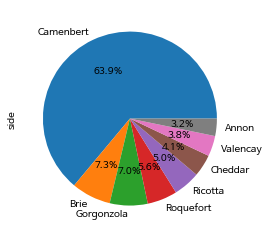

In [48]:
AH_side.plot.pie(autopct="%.1f%%")

- B

In [49]:
data_choice_B=data_merge[data_merge['choice']=='B']
data_choice_B.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
5,6.0,FEMALE,40대,자영업,SINGLE,충청도,진천군,B,Brie,B
6,7.0,MALE,20대,회사직원,SINGLE,경기도,화성시,B,Brie,C
15,16.0,FEMALE,30대,공무원,MARREID,경상도,포항시 남구,B,Brie,B
41,43.0,FEMALE,20대,학생,MARREID,부산시,연제구,B,Roquefort,C
49,51.0,MALE,20대,벤처직원,SINGLE,전라도,구례군,B,Brie,C


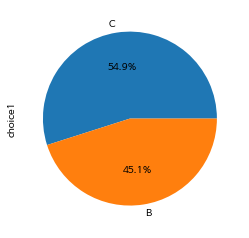

In [50]:
pie(data_choice_B)

- B->B

In [51]:
BB_side=data_merge['side'][(data_merge['choice']=='B')&(data_merge['choice1']=='B')].value_counts()
BB_side

Brie          309
Roquefort      34
Ricotta        30
Gorgonzola     29
Annon          29
Valencay       25
Cheddar        25
Camenbert      23
Name: side, dtype: int64

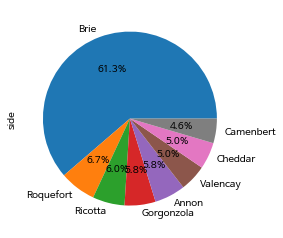

In [52]:
BB_side.plot.pie(autopct="%.1f%%")

- B->C

In [53]:
BC_side=data_merge['side'][(data_merge['choice']=='B')&(data_merge['choice1']=='C')].value_counts()
BC_side

Brie          383
Annon          40
Cheddar        37
Valencay       33
Camenbert      33
Ricotta        32
Roquefort      28
Gorgonzola     28
Name: side, dtype: int64

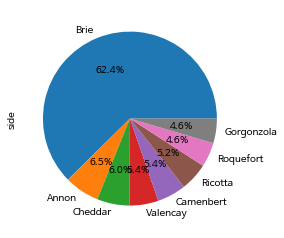

In [54]:
BC_side.plot.pie(autopct="%.1f%%")

- C

In [55]:
data_choice_C=data_merge[data_merge['choice']=='C']
data_choice_C.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
2,3.0,MALE,40대,임시직,MARREID,서울시,강남구,C,Camenbert,B
18,19.0,FEMALE,40대,교수,SINGLE,부산시,해운대구,C,Gorgonzola,B
22,23.0,MALE,30대,자영업,MARREID,부산시,해운대구,C,Cheddar,B
29,31.0,FEMALE,40대,연구원,MARREID,전라도,광양시,C,Annon,C
35,37.0,FEMALE,40대,연구원,SINGLE,충청도,청주시,C,Ricotta,C


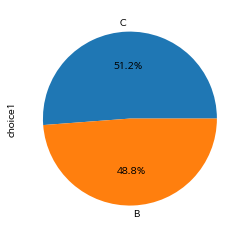

In [56]:
pie(data_choice_C)

- C->B

In [57]:
CB_side=data_merge['side'][(data_merge['choice']=='C')&(data_merge['choice1']=='B')].value_counts()
CB_side

Gorgonzola    315
Cheddar        31
Annon          29
Ricotta        25
Roquefort      24
Brie           17
Valencay       16
Camenbert      15
Name: side, dtype: int64

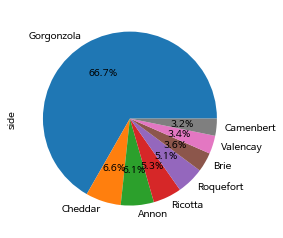

In [58]:
CB_side.plot.pie(autopct="%.1f%%")

- C->C

In [59]:
CC_side=data_merge['side'][(data_merge['choice']=='C')&(data_merge['choice1']=='C')].value_counts()
CC_side

Gorgonzola    318
Brie           27
Roquefort      26
Ricotta        26
Valencay       25
Camenbert      25
Cheddar        25
Annon          23
Name: side, dtype: int64

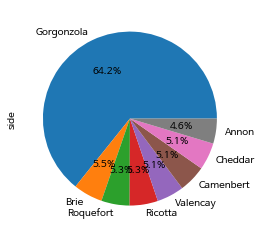

In [60]:
CC_side.plot.pie(autopct="%.1f%%")

- D

In [61]:
data_choice_D=data_merge[data_merge['choice']=='D']
data_choice_D.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
3,4.0,FEMALE,50대,벤처직원,MARREID,경상도,거제시,D,Roquefort,D
7,8.0,FEMALE,50대,중소기업직원,MARREID,경기도,화성시,D,Roquefort,E
8,9.0,FEMALE,40대,회사직원,MARREID,경기도,포천시,D,Brie,E
9,10.0,FEMALE,20대,중소기업직원,MARREID,서울시,강북구,D,Roquefort,D
17,18.0,FEMALE,40대,벤처직원,MARREID,부산시,해운대구,D,Gorgonzola,E


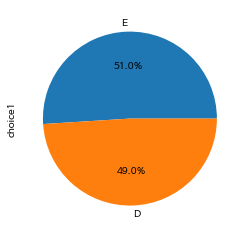

In [62]:
pie(data_choice_D)

- D->D

In [63]:
DD_side=data_merge['side'][(data_merge['choice']=='D')&(data_merge['choice1']=='D')].value_counts()
DD_side

Roquefort     573
Gorgonzola     61
Valencay       57
Annon          54
Cheddar        53
Brie           49
Ricotta        46
Camenbert      36
Name: side, dtype: int64

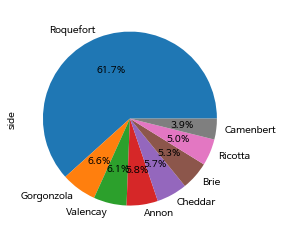

In [64]:
DD_side.plot.pie(autopct="%.1f%%")

- D->E

In [65]:
DE_side=data_merge['side'][(data_merge['choice']=='D')&(data_merge['choice1']=='E')].value_counts()
DE_side

Roquefort     615
Cheddar        57
Brie           57
Gorgonzola     51
Valencay       50
Annon          48
Camenbert      46
Ricotta        43
Name: side, dtype: int64

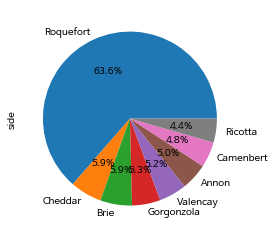

In [66]:
DE_side.plot.pie(autopct="%.1f%%")

- E

In [67]:
data_choice_E=data_merge[data_merge['choice']=='E']
data_choice_E.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
0,1.0,MALE,40대,자영업,MARREID,부산시,기장군,E,Ricotta,E
1,2.0,FEMALE,20대,자영업,SINGLE,충청도,천안시,E,Ricotta,E
4,5.0,MALE,30대,교수,MARREID,경기도,포천시,E,Cheddar,E
11,12.0,FEMALE,30대,연구원,MARREID,부산시,해운대구,E,Ricotta,D
16,17.0,FEMALE,30대,기자,MARREID,충청도,청주시,E,Ricotta,D


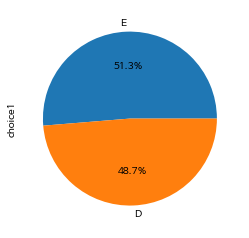

In [68]:
pie(data_choice_E)

- E->D

In [69]:
ED_side=data_merge['side'][(data_merge['choice']=='E')&(data_merge['choice1']=='D')].value_counts()
ED_side

Ricotta       365
Valencay       43
Annon          41
Roquefort      37
Camenbert      35
Gorgonzola     34
Brie           34
Cheddar        30
Name: side, dtype: int64

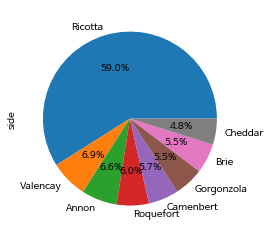

In [70]:
ED_side.plot.pie(autopct="%.1f%%")

- E->E

In [71]:
EE_side=data_merge['side'][(data_merge['choice']=='E')&(data_merge['choice1']=='E')].value_counts()
EE_side

Ricotta       409
Roquefort      42
Valencay       38
Gorgonzola     37
Camenbert      37
Annon          34
Brie           31
Cheddar        24
Name: side, dtype: int64

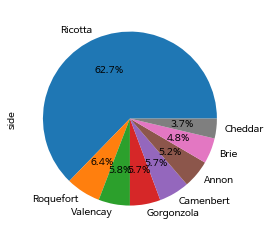

In [72]:
EE_side.plot.pie(autopct="%.1f%%")

- F

In [73]:
data_choice_F=data_merge[data_merge['choice']=='F']
data_choice_F.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
30,32.0,FEMALE,20대,중소기업직원,MARREID,경기도,포천시,F,Brie,A
32,34.0,MALE,40대,벤처직원,MARREID,서울시,강북구,F,Cheddar,H
37,39.0,FEMALE,30대,교수,SINGLE,부산시,연제구,F,Cheddar,F
74,76.0,MALE,30대,의사,SINGLE,경상도,하동군,F,Cheddar,A
79,81.0,MALE,30대,공무원,MARREID,경기도,화성시,F,Cheddar,A


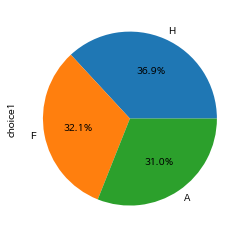

In [74]:
pie(data_choice_F)

- F->A

In [75]:
FA_side=data_merge['side'][(data_merge['choice']=='F')&(data_merge['choice1']=='A')].value_counts()
FA_side

Cheddar       152
Annon          16
Brie           14
Camenbert      13
Ricotta        10
Roquefort      10
Gorgonzola     10
Valencay        8
Name: side, dtype: int64

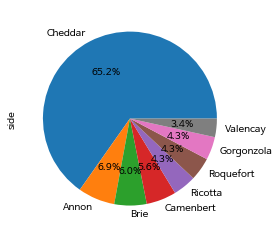

In [76]:
FA_side.plot.pie(autopct="%.1f%%")

- F->F

In [77]:
FF_side=data_merge['side'][(data_merge['choice']=='F')&(data_merge['choice1']=='F')].value_counts()
FF_side

Cheddar       156
Brie           18
Camenbert      16
Annon          16
Valencay       12
Ricotta        10
Gorgonzola      8
Roquefort       5
Name: side, dtype: int64

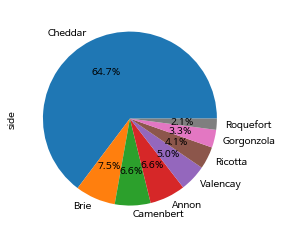

In [78]:
FF_side.plot.pie(autopct="%.1f%%")

- F->H

In [79]:
FH_side=data_merge['side'][(data_merge['choice']=='F')&(data_merge['choice1']=='H')].value_counts()
FH_side

Cheddar       182
Roquefort      18
Annon          16
Ricotta        15
Camenbert      14
Gorgonzola     12
Brie           12
Valencay        8
Name: side, dtype: int64

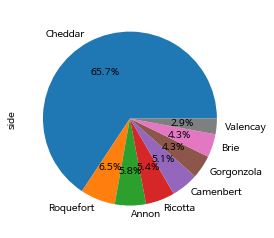

In [80]:
FH_side.plot.pie(autopct="%.1f%%")

- G

In [81]:
data_choice_G=data_merge[data_merge['choice']=='G']
data_choice_G.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
13,14.0,FEMALE,30대,임시직,SINGLE,서울시,양천구,G,Gorgonzola,G
14,15.0,MALE,40대,자영업,MARREID,충청도,진천군,G,Cheddar,G
20,21.0,FEMALE,50대,자영업,SINGLE,서울시,강북구,G,Brie,G
33,35.0,FEMALE,50대,임시직,MARREID,경상도,포항시 남구,G,Valencay,G
39,41.0,FEMALE,30대,자영업,SINGLE,충청도,청주시,G,Ricotta,G


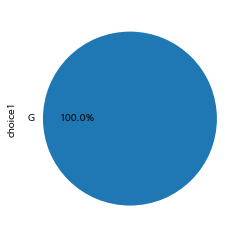

In [82]:
pie(data_choice_G)

- G -> G

In [83]:
G_side=data_merge['side'][(data_merge['choice']=='G')&(data_merge['choice1']=='G')].value_counts()
G_side

Valencay      1088
Brie           106
Ricotta        103
Gorgonzola      99
Cheddar         99
Annon           91
Camenbert       87
Roquefort       87
Name: side, dtype: int64

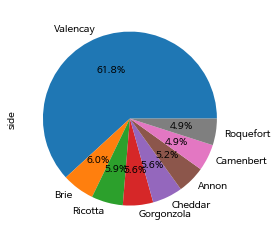

In [84]:
G_side.plot.pie(autopct="%.1f%%")

- H

In [85]:
data_choice_H=data_merge[data_merge['choice']=='H']
data_choice_H.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
10,11.0,FEMALE,50대,벤처직원,SINGLE,부산시,사하구,H,Ricotta,H
51,53.0,FEMALE,60대 이상,회사직원,MARREID,전라도,해남군,H,Annon,H
62,64.0,MALE,40대,벤처직원,MARREID,부산시,해운대구,H,Annon,H
63,65.0,FEMALE,40대,의사,SINGLE,서울시,강동구,H,Annon,H
72,74.0,MALE,40대,벤처직원,SINGLE,부산시,해운대구,H,Annon,F


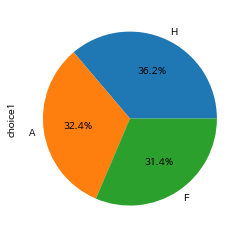

In [86]:
pie(data_choice_H)

- H -> H

In [87]:
HH_side=data_merge['side'][(data_merge['choice']=='H')&(data_merge['choice1']=='H')].value_counts()
HH_side

Annon         227
Camenbert      27
Ricotta        22
Roquefort      19
Gorgonzola     19
Cheddar        19
Brie           19
Valencay       10
Name: side, dtype: int64

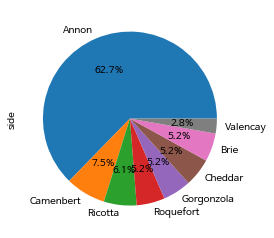

In [88]:
HH_side.plot.pie(autopct="%.1f%%")

- H -> A

In [89]:
HA_side=data_merge['side'][(data_merge['choice']=='H')&(data_merge['choice1']=='A')].value_counts()
HA_side

Annon         208
Ricotta        25
Roquefort      17
Gorgonzola     17
Valencay       16
Camenbert      16
Cheddar        13
Brie           12
Name: side, dtype: int64

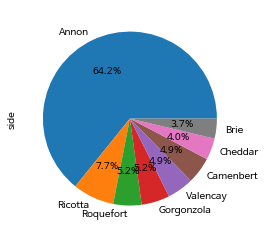

In [90]:
HA_side.plot.pie(autopct="%.1f%%")

- H -> F

In [91]:
HF_side=data_merge['side'][(data_merge['choice']=='H')&(data_merge['choice1']=='F')].value_counts()
HF_side

Annon         204
Ricotta        21
Valencay       21
Brie           21
Roquefort      16
Camenbert      12
Cheddar        11
Gorgonzola      8
Name: side, dtype: int64

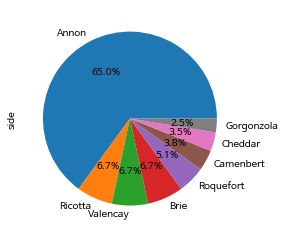

In [92]:
HF_side.plot.pie(autopct="%.1f%%")

### 와인 전후 같은것

In [93]:
data_equal = data_merge[data_merge['choice']==data_merge['choice1']]
data_equal.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
0,1.0,MALE,40대,자영업,MARREID,부산시,기장군,E,Ricotta,E
1,2.0,FEMALE,20대,자영업,SINGLE,충청도,천안시,E,Ricotta,E
3,4.0,FEMALE,50대,벤처직원,MARREID,경상도,거제시,D,Roquefort,D
4,5.0,MALE,30대,교수,MARREID,경기도,포천시,E,Cheddar,E
5,6.0,FEMALE,40대,자영업,SINGLE,충청도,진천군,B,Brie,B


### 와인 전후 다른것

In [94]:
data_notequal = data_merge[data_merge['choice']!=data_merge['choice1']]
data_notequal.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1
2,3.0,MALE,40대,임시직,MARREID,서울시,강남구,C,Camenbert,B
6,7.0,MALE,20대,회사직원,SINGLE,경기도,화성시,B,Brie,C
7,8.0,FEMALE,50대,중소기업직원,MARREID,경기도,화성시,D,Roquefort,E
8,9.0,FEMALE,40대,회사직원,MARREID,경기도,포천시,D,Brie,E
11,12.0,FEMALE,30대,연구원,MARREID,부산시,해운대구,E,Ricotta,D


In [95]:
# 데이터 정보 확인
data_equal.info()

print("")
print("-----------------------------------------------")
print("")

# 데이터 정보 확인
data_notequal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 0 to 9841
Data columns (total 10 columns):
seq         5314 non-null float64
gender      5314 non-null object
age         5314 non-null object
job         5314 non-null object
marital     5314 non-null object
province    5314 non-null object
city        5314 non-null object
choice      5314 non-null object
side        5314 non-null object
choice1     5314 non-null object
dtypes: float64(1), object(9)
memory usage: 456.7+ KB

-----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4528 entries, 2 to 9840
Data columns (total 10 columns):
seq         4528 non-null float64
gender      4528 non-null object
age         4528 non-null object
job         4528 non-null object
marital     4528 non-null object
province    4528 non-null object
city        4528 non-null object
choice      4528 non-null object
side        4528 non-null object
choice1     4528 non-null object
dtypes: float64(1), 

#

전후 같은 사람 수 : 5356명

전후 다른 사람 수 : 4560명

총 9916명

#

### graph

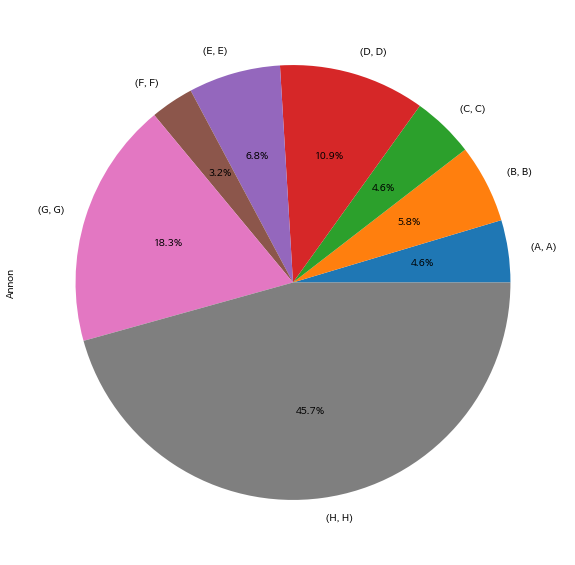

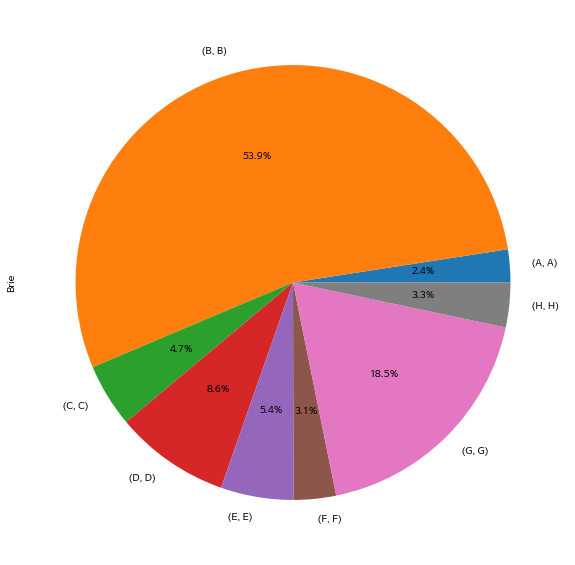

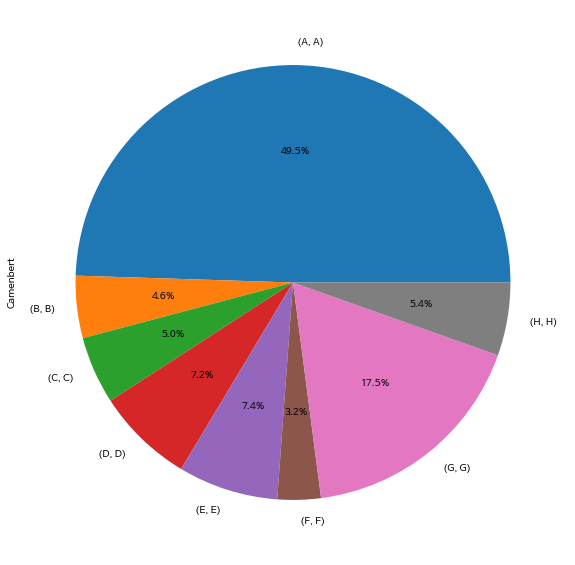

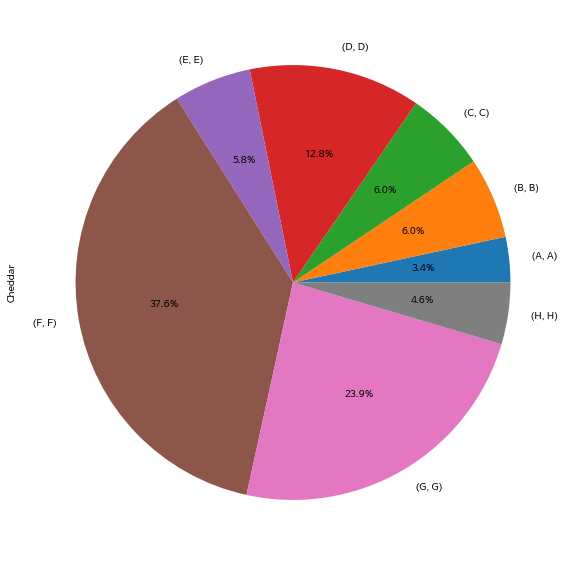

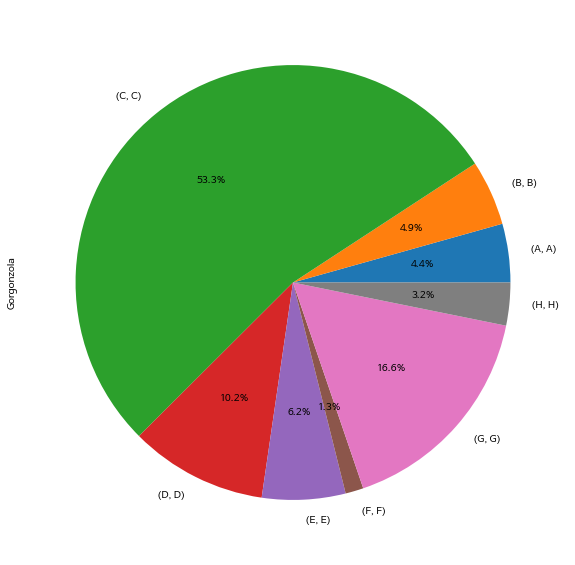

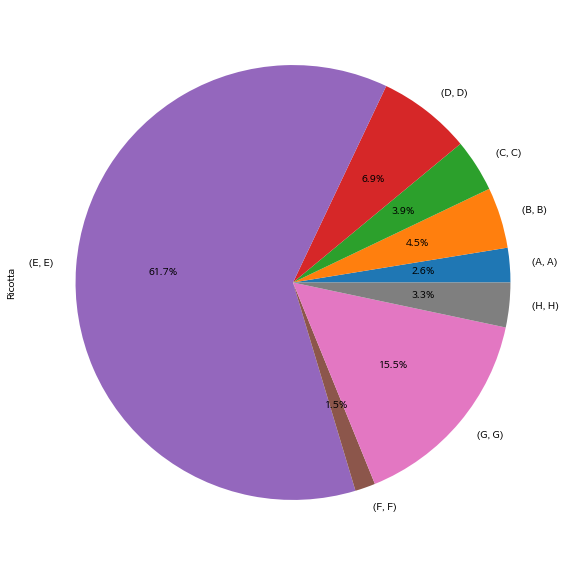

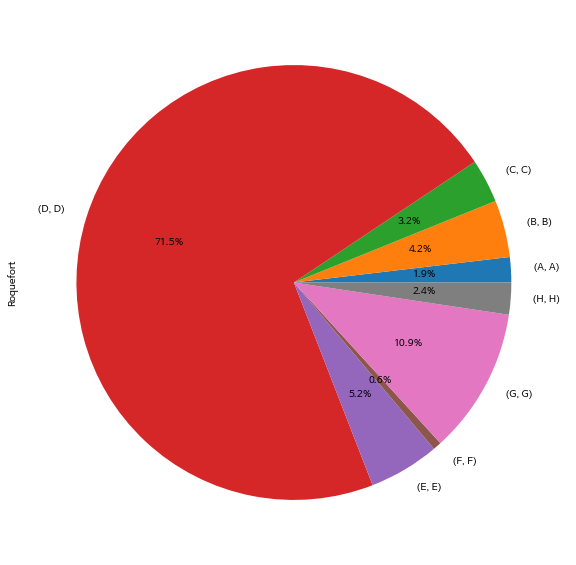

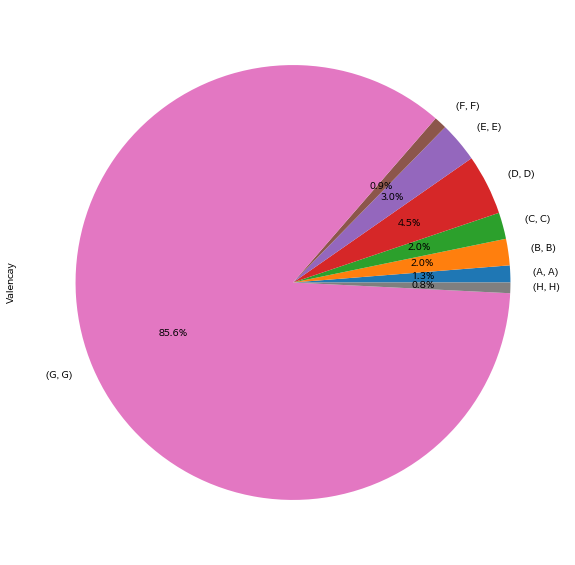

In [96]:
for wine_equal in data_equal.groupby('side').size().index:
    graph=data_equal[data_equal['side']==wine_equal].groupby(["choice","choice1"]).size()
    plt.figure(figsize=(10,10))
    graph.plot.pie(y="choice1", autopct="%.1f%%",  label=wine_equal)

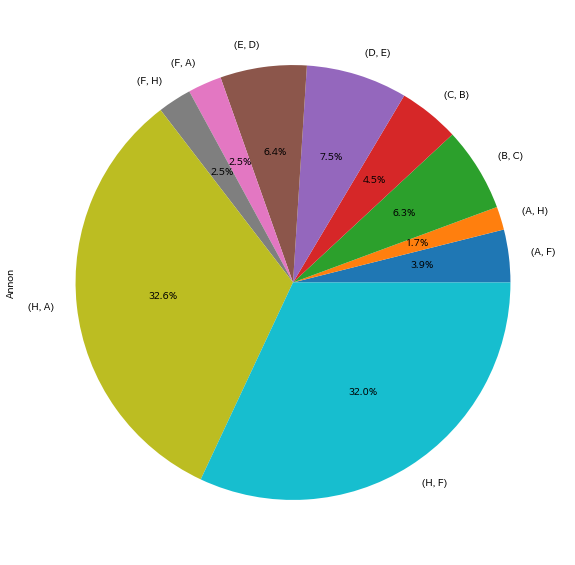

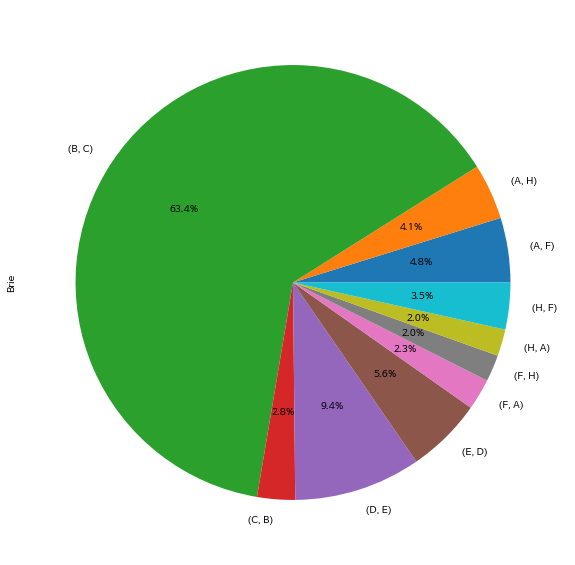

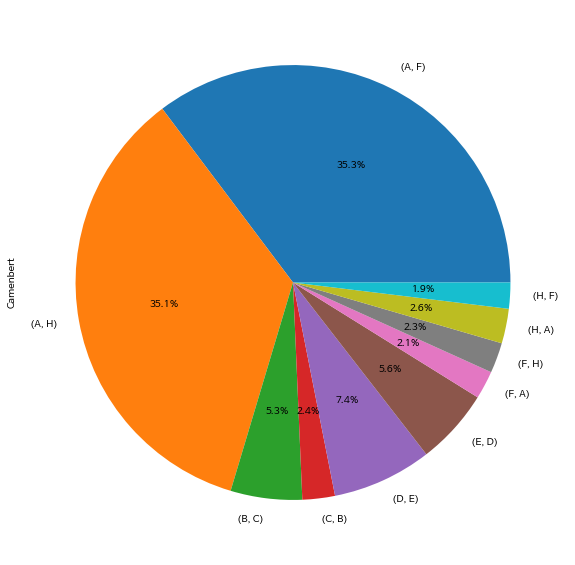

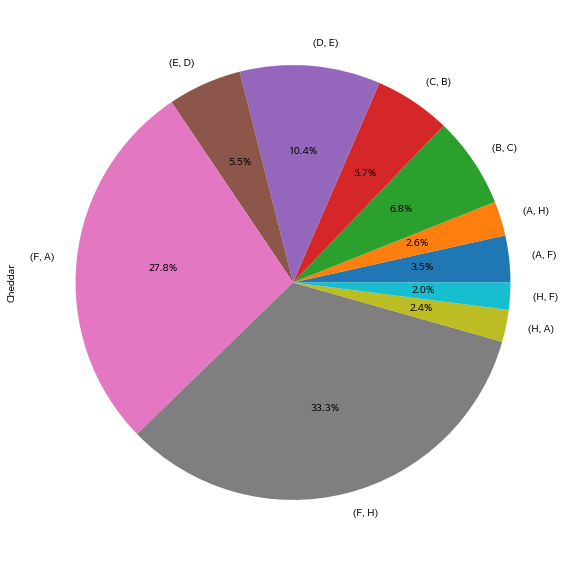

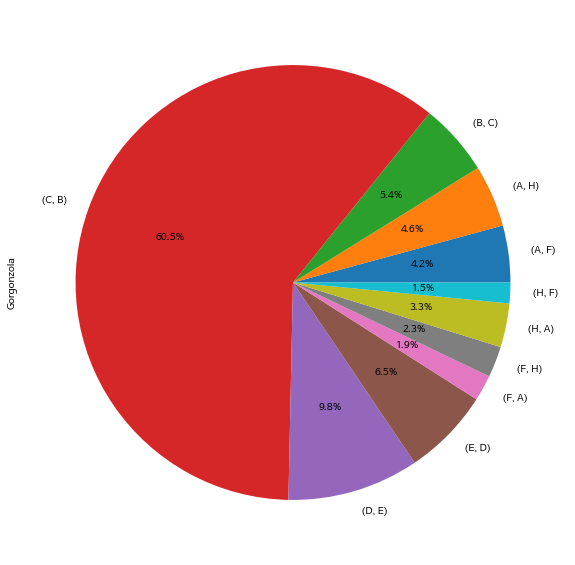

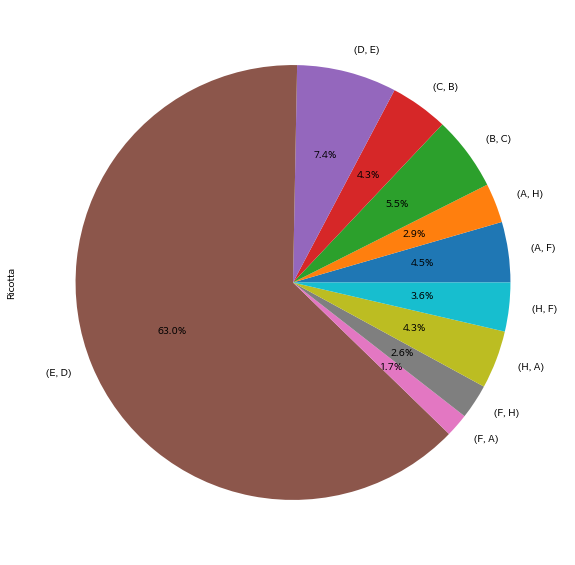

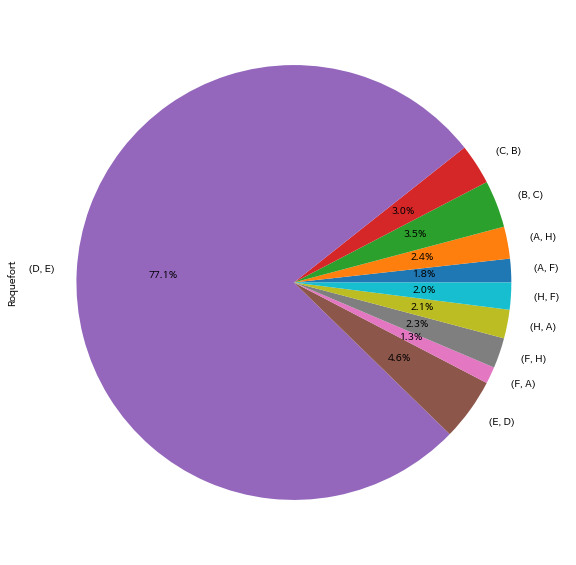

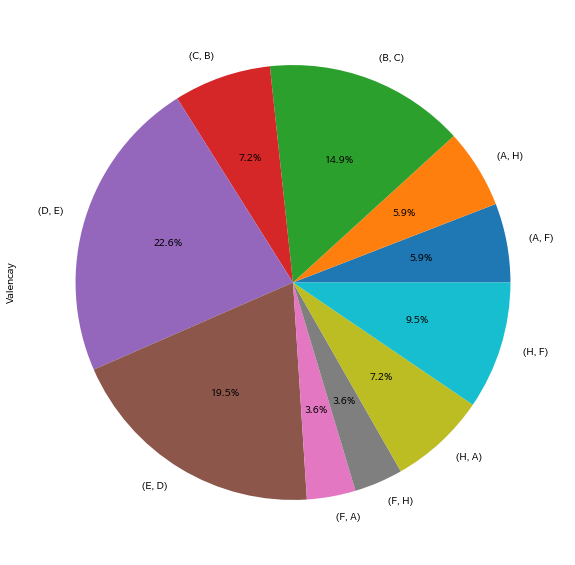

In [97]:
for wine_notequal in data_notequal.groupby('side').size().index:
    graph=data_notequal[data_notequal['side']==wine_notequal].groupby(["choice","choice1"]).size()
    plt.figure(figsize=(10,10))
    graph.plot.pie(y="choice1", autopct="%.1f%%",  label=wine_notequal)

### Network

/home/pirl/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


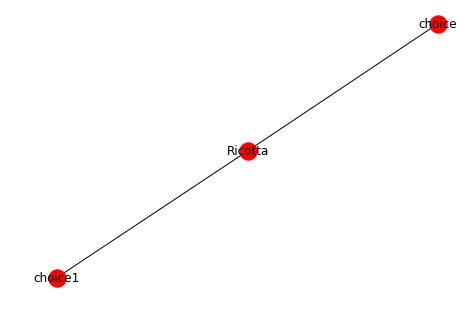

In [98]:
%matplotlib inline

import pandas as pd
import networkx as nx

df = pd.read_csv("wine_side_prefer.csv")
df.head()

g = nx.from_pandas_edgelist(df, source='side', target=['choice','choice1']) 
nx.draw(g, with_labels=True)
plt.show()

/home/pirl/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


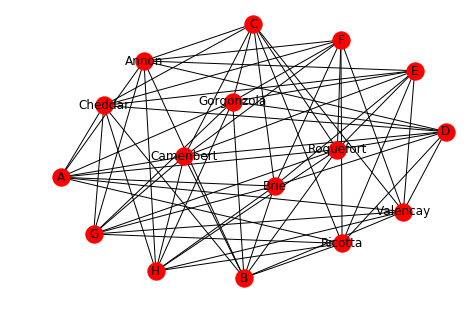

In [99]:
%matplotlib inline

import pandas as pd
import networkx as nx

df = pd.read_csv("wine_side_prefer.csv")
df.head()

g = nx.from_pandas_edgelist(df, source='side', target='choice') 
nx.draw(g, with_labels=True)
plt.show()


### KNN

In [100]:
data_notequal.loc[data_notequal["side"] == "Annon", "side_n"] = 1
data_notequal.loc[data_notequal["side"] == "Brie", "side_n"] = 2
data_notequal.loc[data_notequal["side"] == "Cheddar", "side_n"] = 3
data_notequal.loc[data_notequal["side"] == "Ricotta", "side_n"] = 4
data_notequal.loc[data_notequal["side"] == "Camenbert", "side_n"] = 5
data_notequal.loc[data_notequal["side"] == "Roquefort", "side_n"] = 6
data_notequal.loc[data_notequal["side"] == "Gorgonzola", "side_n"] = 7
data_notequal.loc[data_notequal["side"] == "Valencay", "side_n"] = 8

/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [101]:
data_notequal.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1,side_n
2,3.0,MALE,40대,임시직,MARREID,서울시,강남구,C,Camenbert,B,5.0
6,7.0,MALE,20대,회사직원,SINGLE,경기도,화성시,B,Brie,C,2.0
7,8.0,FEMALE,50대,중소기업직원,MARREID,경기도,화성시,D,Roquefort,E,6.0
8,9.0,FEMALE,40대,회사직원,MARREID,경기도,포천시,D,Brie,E,2.0
11,12.0,FEMALE,30대,연구원,MARREID,부산시,해운대구,E,Ricotta,D,4.0


In [102]:
data_knn=data_notequal[["choice","choice1","side_n"]]
data_knn.head()

,choice,choice1,side_n
2,C,B,5.0
6,B,C,2.0
7,D,E,6.0
8,D,E,2.0
11,E,D,4.0


In [103]:
# 데이터의 문자형 변수에 대한 더미변수 생성
data_dummy=pd.get_dummies(data_knn)
data_dummy.head()

,side_n,choice_A,choice_B,choice_C,choice_D,choice_E,choice_F,choice_H,choice1_A,choice1_B,choice1_C,choice1_D,choice1_E,choice1_F,choice1_H
2,5.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,2.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7,6.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,2.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11,4.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [104]:
# 설명변수, 목표변수 데이터 지정
data_x=data_dummy.drop("side_n", axis=1, inplace=False)
data_y=data_dummy["side_n"]

In [105]:
# 데이터 분할
train_x, test_x, train_y, test_y=train_test_split(data_x,data_y, test_size=0.3, random_state=1)
print("train data X size : {}".format(train_x.shape))
print("train data Y size : {}".format(train_y.shape))
print("test data X size : {}".format(test_x.shape))
print("test data Y size : {}".format(test_y.shape))

train data X size : (3169, 14)
train data Y size : (3169,)
test data X size : (1359, 14)
test data Y size : (1359,)


In [106]:
# KNN 모델 생성(default설정)
knn_un=KNeighborsClassifier()
knn_un.fit(train_x, train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_un.score(train_x, train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_un.score(test_x, test_y)))

knn_un

Accuracy on training set: 0.628
Accuracy on test set: 0.641


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# 최대 이웃수: 1~15
para_n_neighbors=[i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(train_x, train_y)
    train_accuracy.append(knn.score(train_x, train_y))
    test_accuracy.append(knn.score(test_x, test_y))
    
# 데이터 테이블로 저장
accuracy_neighbors=pd.DataFrame()
accuracy_neighbors["Neighbors"]=para_n_neighbors
accuracy_neighbors["TrainAccuracy"]=train_accuracy
accuracy_neighbors["TestAccuracy"]=test_accuracy
accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,0.596,0.609
1,2,0.554,0.561
2,3,0.584,0.608
3,4,0.628,0.641
4,5,0.628,0.641
5,6,0.628,0.641
6,7,0.628,0.641
7,8,0.628,0.641
8,9,0.628,0.641
9,10,0.628,0.641


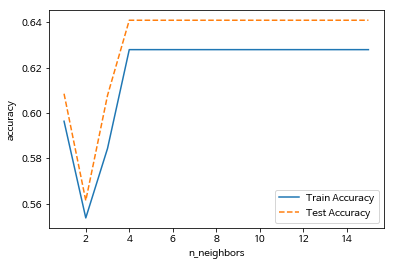

In [108]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

In [109]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# 이웃 수
para_n_neighbors=[i for i in range(1,11)]*2
# 가중치 (uniform, distance)
para_weights=(["uniform"])*10+(["distance"]*10)

# zip를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors=para_n_neighbors[0], weights=para_weights[0]
# 2번 loop: n_neighbors=para_n_neighbors[1], weights=para_weights[1]
for(v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(train_x, train_y)
    train_accuracy.append(knn.score(train_x, train_y))
    test_accuracy.append(knn.score(test_x, test_y))
# 데이터 테이블로 저장
accuracy_weights=pd.DataFrame()
accuracy_weights["Neighbors"]=para_n_neighbors
accuracy_weights["Weights"]=para_weights
accuracy_weights["TrainAccuracy"]=train_accuracy
accuracy_weights["TestAccuracy"]=test_accuracy
accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,0.596,0.609
1,2,uniform,0.554,0.561
2,3,uniform,0.584,0.608
3,4,uniform,0.628,0.641
4,5,uniform,0.628,0.641
5,6,uniform,0.628,0.641
6,7,uniform,0.628,0.641
7,8,uniform,0.628,0.641
8,9,uniform,0.628,0.641
9,10,uniform,0.628,0.641


In [110]:
# 그림을 그리기 위해 데이터의 형태를 변환
accuracy_weights_pivot=accuracy_weights.pivot(index="Neighbors", columns="Weights",
                                              values=["TrainAccuracy","TestAccuracy"])
accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1              0.596403  0.596403     0.608536  0.608536
2              0.553802  0.553802     0.561442  0.561442
3              0.584411  0.584411     0.607800  0.607800
4              0.627958  0.627958     0.640912  0.640912
5              0.627958  0.627958     0.640912  0.640912
6              0.627958  0.627958     0.640912  0.640912
7              0.627958  0.627958     0.640912  0.640912
8              0.627958  0.627958     0.640912  0.640912
9              0.627958  0.627958     0.640912  0.640912
10             0.627958  0.627958     0.640912  0.640912

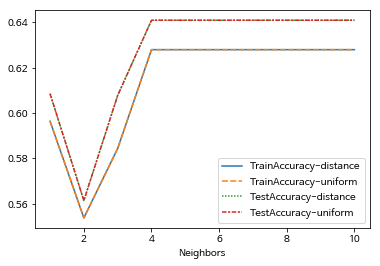

In [111]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0=accuracy_weights_pivot.columns.get_level_values(0)
level1=accuracy_weights_pivot.columns.get_level_values(1)
accuracy_weights_pivot.columns=level0+"-"+level1
accuracy_weights_pivot.head()

# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data=accuracy_weights_pivot)

In [112]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# 이웃 수
para_n_neighbors=[i for i in range(1,11)]*3
# 거리 계산 방법
para_metric=["minkowski"]*10+["euclidean"]*10+["manhattan"]*10

for(v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn=KNeighborsClassifier(weights="uniform",n_neighbors=v_n_neighbors, metric=v_metric)
    knn.fit(train_x, train_y)
    train_accuracy.append(knn.score(train_x, train_y))
    test_accuracy.append(knn.score(test_x, test_y))

# 데이터 테이블로 저장
accuracy_metric=pd.DataFrame()
accuracy_metric["Neighbors"]=para_n_neighbors
accuracy_metric["Metric"]=para_metric
accuracy_metric["TrainAccuracy"]=train_accuracy
accuracy_metric["TestAccuracy"]=test_accuracy

accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,0.596,0.609
1,2,minkowski,0.554,0.561
2,3,minkowski,0.584,0.608
3,4,minkowski,0.628,0.641
4,5,minkowski,0.628,0.641
5,6,minkowski,0.628,0.641
6,7,minkowski,0.628,0.641
7,8,minkowski,0.628,0.641
8,9,minkowski,0.628,0.641
9,10,minkowski,0.628,0.641


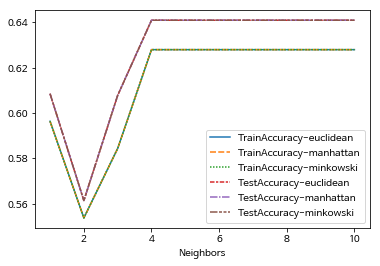

In [113]:
# 정확도를 그래프로 그림
accuracy_metric_pivot=accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy","TestAccuracy"])
level0=accuracy_metric_pivot.columns.get_level_values(0)
level1=accuracy_metric_pivot.columns.get_level_values(1)
accuracy_metric_pivot.columns=level0+"-"+level1
sns.lineplot(data=accuracy_metric_pivot)

In [114]:
# 최종 모델
knn_model=KNeighborsClassifier(n_neighbors=4, weights="uniform", metric="euclidean")
knn_model.fit(train_x, train_y)
# 평가
y_pred=knn_model.predict(test_x)
# train 데이터 셋 정확도
print("Score on training set:{:.3f}".format(knn_model.score(train_x, train_y)))
# test 데이터 셋 정확도
print("Score on test set :{:.3f}".format(knn_model.score(test_x, test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(test_y,y_pred)))

Score on training set:0.628
Score on test set :0.641
Confusion matrix: 
[[127  11  11   8  11  15   7   0]
 [ 10 119   9  11  11  14   4   0]
 [  7  12 103  10  12  14  11   0]
 [ 20  10  10 118  15  12  10   0]
 [  7   9   8   9 122   9   5   0]
 [ 14   7   7   9  10 189  10   0]
 [  8   7   5  11  15  10  93   0]
 [  9  10   5  12   5  18   4   0]]


### GB

In [115]:
# 그래디언트 부스팅 모델 생성
gb_un=GradientBoostingClassifier(random_state=1)
gb_un.fit(train_x, train_y)
# train 데이터 셋 정확도
print("Accuracy on training set : {:.3f}".format(gb_un.score(train_x,train_y)))
# test 데이터 셋 정학도
print("Accuracy on test set : {:.3f}".format(gb_un.score(test_x, test_y)))

Accuracy on training set : 0.628
Accuracy on test set : 0.641


In [116]:
# 생성된 랜덤 포레스트 모델의 옵션 확인
gb_un

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [118]:
# train & test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# learning_rate 학습률 변경: 0.1~0.9
para_lr=[lr*0.1 for lr in range(1,16)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate= v_learning_rate,random_state=1)
    gb.fit(train_x, train_y)
    train_accuracy.append(gb.score(train_x,train_y))
    test_accuracy.append(gb.score(test_x,test_y))
# 데이터 테이블로 저장
accuracy_lr=pd.DataFrame()
accuracy_lr["LearningRate"]=para_lr
accuracy_lr["TrainAccuracy"]=train_accuracy
accuracy_lr["TestAccuracy"]=test_accuracy

In [ ]:
# LearningRate별 정확도 테이블
accuracy_lr.round(3)

In [ ]:
# LearningRate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("learning rate"); plt.ylabel("accuracy")
plt.legend()

In [ ]:
# train & test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# n_estimators: 트리 수 변경 1~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators = v_n_estimators,learning_rate=0.1,random_state=1)
    gb.fit(train_x, train_y)
    train_accuracy.append(gb.score(train_x,train_y))
    test_accuracy.append(gb.score(test_x,test_y))
# 데이터 테이블로 저장
accuracy_n=pd.DataFrame()
accuracy_n["n_estimation"]=para_n_tree
accuracy_n["TrainAccuracy"]=train_accuracy
accuracy_n["TestAccuracy"]=test_accuracy

In [ ]:
# 모델 정확도 확인
accuracy_n.round(3)

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [ ]:
# train및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(random_state=1,learning_rate=0.1,max_depth=v_max_depth)
    gb.fit(train_x,train_y)
    train_accuracy.append(gb.score(train_x,train_y))
    test_accuracy.append((gb.score(test_x,test_y)))

# 데이터 테이블로 저장
accuracy_depth=pd.DataFrame()
accuracy_depth["Depth"] = para_depth
accuracy_depth["TrainAccuracy"] = train_accuracy
accuracy_depth["TestAccuracy"] = test_accuracy

In [ ]:
# 모델 정확도 확인
accuracy_depth.round(3)

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

# max_depth=4 지정

In [ ]:
# train및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split*10 for n_split in range(2,11)]

for v_min_samples_split in para_split :
    gb = GradientBoostingClassifier(random_state=1,learning_rate=0.1,min_samples_split=v_min_samples_split)
    gb.fit(train_x,train_y)
    train_accuracy.append(gb.score(train_x,train_y))
    test_accuracy.append((gb.score(test_x,test_y)))

# 데이터 테이블로 저장
accuracy_split=pd.DataFrame()
accuracy_split["MinSamplessplit"]=para_split
accuracy_split["TrainAccuracy"]=train_accuracy
accuracy_split["TestAccuracy"]=test_accuracy
# 모델 정확도 확인
accuracy_split.round(3)

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [ ]:
# train및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수 제한
para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    gb=GradientBoostingClassifier(random_state=1,learning_rate=0.1, min_samples_leaf=v_min_samples_leaf)
    gb.fit(train_x,train_y)
    train_accuracy.append(gb.score(train_x,train_y))
    test_accuracy.append((gb.score(test_x,test_y)))

# 데이터 테이블로 저장
accuracy_leaf = pd.DataFrame()
accuracy_leaf["MinSamplesleaf"] = para_leaf
accuracy_leaf["TrainAccuracy"] = train_accuracy
accuracy_leaf["TestAccuracy"] = test_accuracy
# 모델 정확도 확인
accuracy_leaf.round(3)

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

# min samples_leaf=10 지정

In [ ]:
# 최종 모델
gb_final=GradientBoostingClassifier(random_state=1, learning_rate=0.1)
gb_final.fit(train_x,train_y)
# 평가
y_pred=gb_final.predict(test_x)

# train 데이터 셋 정확도
print("Acccuracy on training set: {:.3f}\n".format(gb_final.score(train_x,train_y)))
# test 데이터 셋 정확도
print("Acccuracy on test set: {:.3f}\n".format(gb_final.score(test_x,test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(test_y,y_pred)))

In [ ]:
# 변수명
v_feature_name=train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
importance = pd.DataFrame()
importance["Feature"]=v_feature_name
importance["Importance"]=gb_final.feature_importances_
# feature_importance의 테이블을 중요도 순으로 정렬
importance.sort_values("Importance",ascending=False,inplace=True)
importance.round(3)      

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
importance.sort_values("Importance",ascending=True, inplace=True)
coordinates =range(len(importance))
plt.barh(y=coordinates,width=importance["Importance"])
plt.yticks(coordinates,importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

### k modes 군집 분석

In [ ]:
data_notequal_kmodes = data_notequal.drop(['gender','age','job','marital','province','city'], axis=1)
data_notequal_kmodes.dropna(inplace = True)
data_notequal_kmodes.info()

In [ ]:
data_kmode=data_notequal_kmodes[["choice","choice1","side_n"]]
data_kmode.head()

In [ ]:
# dummy version
data_notequal_kmodes_dummy=pd.get_dummies(data_kmode)
data_notequal_kmodes_dummy.head()

In [ ]:
# define the k-modes model
### n_clusters
### init
### n_init
### verbose
km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)

# Fit: 오래 걸림
clusters = km.fit_predict(data_notequal_kmodes_dummy)

# an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape

# 군집 mode(1, 0 vector) 각각에 값이 1인 column 찾아서 표시
# 1이 없으면 군집에 'unknown' 배정
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("Unknown customers")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in data_notequal_kmodes_dummy.columns[np.nonzero(cent)]:
            print(j)

### K modes 군집분석 다시

In [ ]:
data_notequal_kmodes = data_notequal.drop(['gender','age','job','marital','province','city'], axis=1)
data_notequal_kmodes.dropna(inplace = True)
data_notequal_kmodes.info()

In [ ]:
data_notequal_kmodes.head()

In [ ]:
data_kmode=data_notequal_kmodes[["choice","choice1","side"]]
data_kmode.head()

In [ ]:
# dummy version
data_notequal_kmodes_dummy=pd.get_dummies(data_kmode)
data_notequal_kmodes_dummy.head()

In [ ]:
# define the k-modes model
### n_clusters
### init
### n_init
### verbose
km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)

# Fit: 오래 걸림
clusters = km.fit_predict(data_notequal_kmodes_dummy)

# an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape

# 군집 mode(1, 0 vector) 각각에 값이 1인 column 찾아서 표시
# 1이 없으면 군집에 'unknown' 배정
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("Unknown customers")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in data_notequal_kmodes_dummy.columns[np.nonzero(cent)]:
            print(j)